In [ ]:
# Install Necessary Libraries

! pip install -q datasets
! pip install -q pytesseract
! pip install -q pyyaml==5.1
! sudo apt install tesseract-ocr
! pip install -q git+https://github.com/huggingface/transformers.git
! python -m pip install -q 'git+https://github.com/facebookresearch/detectron2.git'
! pip install -q torch==1.8.0+cu101 torchvision==0.9.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html


## Restart runtime


<center><h1> What is Transfer Learning </h1> </center>

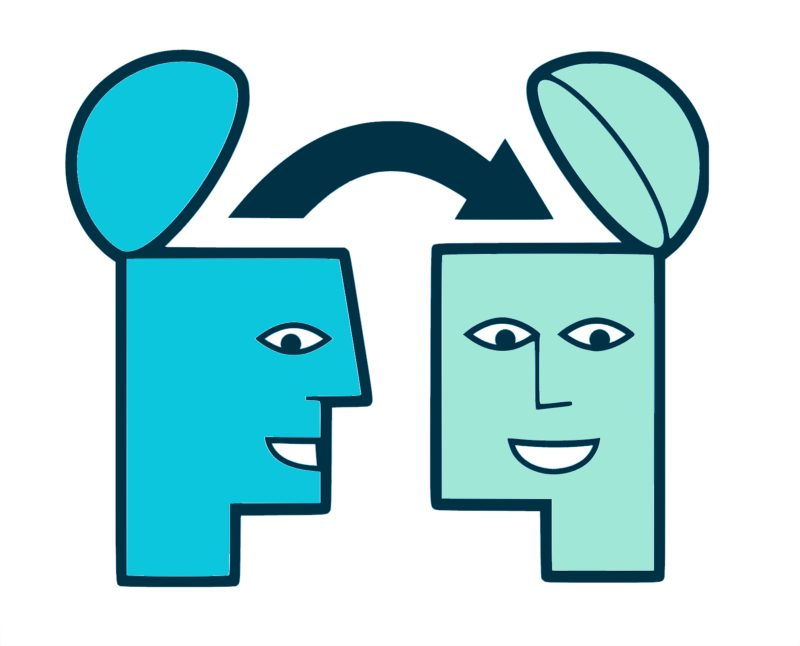


The ability to transfer knowledge across tasks is inherent in humans. We acquire knowledge while learning on task, and subsequently use it to solve related tasks. The more closely related the tasks are, the easier it is for us to transfer the knowledge.

Transfer Learning is the reuse of a previously learned model on a new problem. It is a method where a model developed for one task is re-purposed as the starting point for a model on another related task as an optimization that allows rapid progress when modeling the second task.


> Transfer learning and domain adaptation refer to the situation where what has been learned in one setting … is exploited to improve generalization in another setting

> — Page 526, Deep Learning, 2016.

##### Transfer learning is an optimization that allows rapid progress or improved performance when modeling the second task.

> Transfer learning is the improvement of learning in a new task through the transfer of knowledge from a related task that has already been learned.

> — Chapter 11: Transfer Learning, Handbook of Research on Machine Learning Applications, 2009.



With transfer learning, we basically try to exploit what has been learned in one task to improve generalization in another. We transfer the weights that a network has learned at "task A" to a new "task B."


#### When Transfer Learning may be used:

* There isn't enough labeled training data to train your network from scratch.

* There already exists a network that is pre-trained on a similar task, which is usually trained on massive amounts of data.

* When task A and task B have the same input.

## Benefits

Transfer learning offers a number of advantages, the most important of which are reduced training time, improved neural network performance (in most circumstances), and the absence of a large amount of data.

Transfer learning is so common that it is rare to train a model for an image or natural language processing-related tasks from scratch.



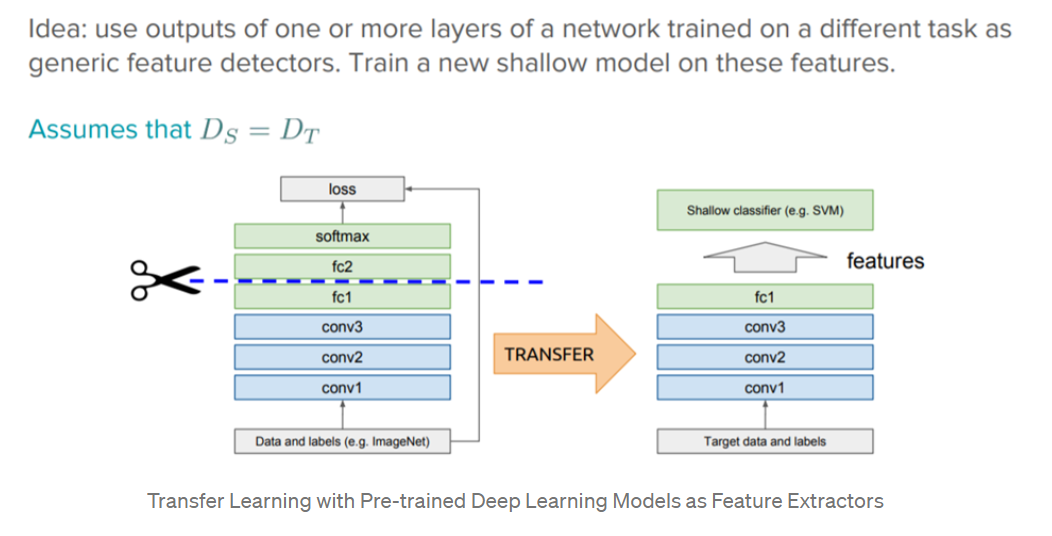



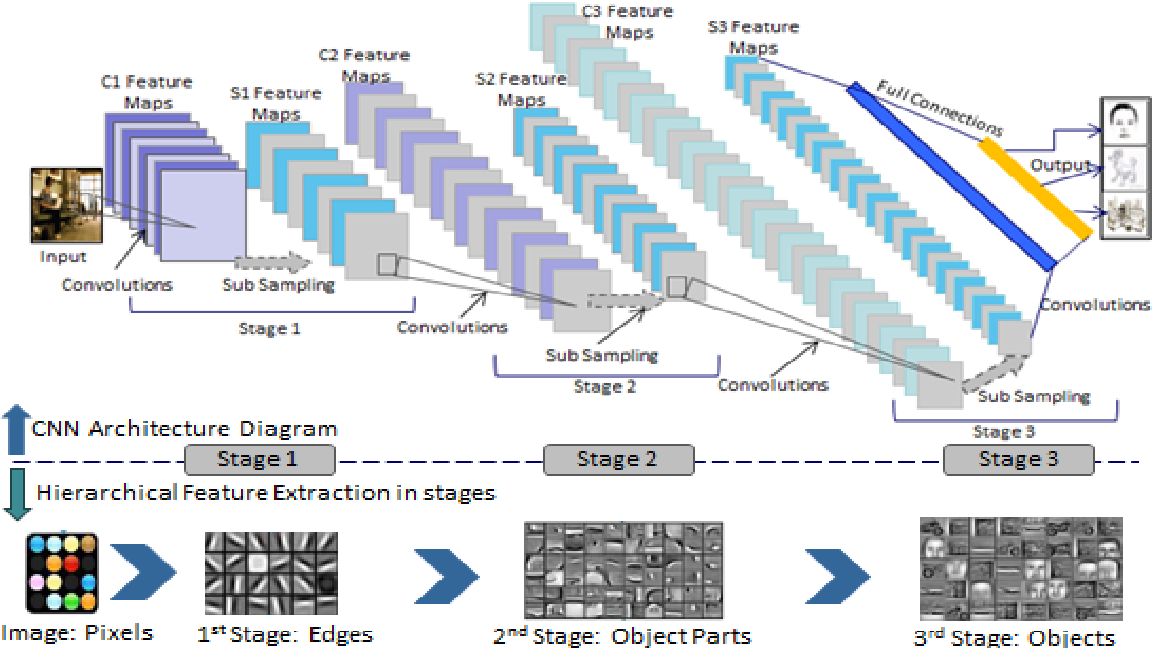


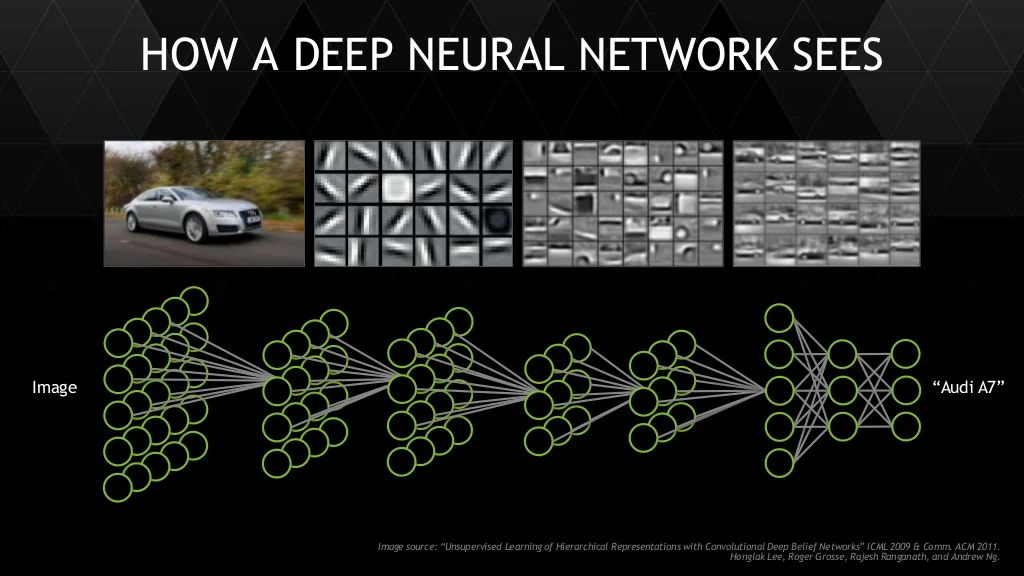

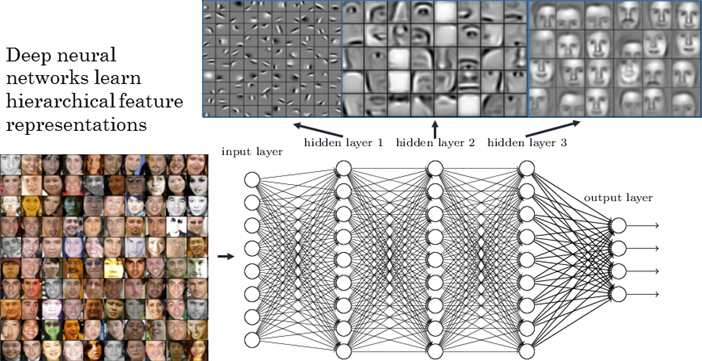

Deep Neural Networks are used to solve image-related tasks as they can work well identifying complex features of the image. The dense layers contain the logic for detecting the image; thus, tuning the higher layers will not affect the base logic. Image Recognition, Object Detection, noise removal from images, etc., are typical application areas of Transfer learning because all image-related tasks require basic knowledge and pattern detection of familiar images.

# Lets write some code

In [ ]:
import os
import PIL
import time
import torch
import zipfile
import pathlib
import numpy as np
import pytesseract
import pandas as pd
import tensorflow as tf
from datasets import Dataset 
import requests, zipfile, io
from tensorflow import keras
from transformers import AdamW
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from PIL import Image, ImageDraw, ImageFont
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.layers import Dense, Flatten
from transformers import LayoutLMv2ForSequenceClassification
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from datasets import Features, Sequence, ClassLabel, Value, Array2D, Array3D
from transformers import LayoutLMv2FeatureExtractor, LayoutLMv2Tokenizer, LayoutLMv2Processor

### Download Flower Classification Dataset

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228827136/228813984 [==============================] - 2s 0us/step


In [ ]:
img_height, img_width = 128, 128
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


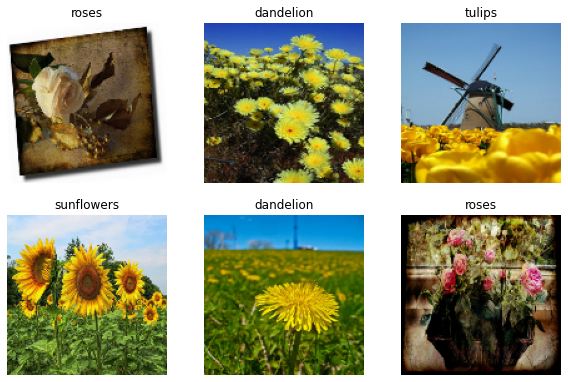

In [ ]:
class_names = train_ds.class_names

plt.figure(figsize=(10, 10))

for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
pretrained_model= tf.keras.applications.ResNet50(
                   input_shape=(128, 128, 3),
                   pooling='avg', classes=5,
                   weights=None)

pretrained_model.compile(optimizer=Adam(lr=0.0001), 
                         loss='sparse_categorical_crossentropy', 
                         metrics=['accuracy'])

In [ ]:
epochs=10

start = time.process_time()
history = pretrained_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

print("Time Elapsed -- ", time.process_time() - start)

Epoch 1/10
92/92 [==============================] - 21s 157ms/step - loss: 1.5472 - accuracy: 0.3883 - val_loss: 2.4357 - val_accuracy: 0.2398
Epoch 2/10
92/92 [==============================] - 14s 149ms/step - loss: 1.2562 - accuracy: 0.4891 - val_loss: 2.7839 - val_accuracy: 0.2398
Epoch 3/10
92/92 [==============================] - 14s 149ms/step - loss: 1.1319 - accuracy: 0.5511 - val_loss: 2.3348 - val_accuracy: 0.3052
Epoch 4/10
92/92 [==============================] - 14s 149ms/step - loss: 1.0699 - accuracy: 0.5756 - val_loss: 2.0826 - val_accuracy: 0.3801
Epoch 5/10
92/92 [==============================] - 14s 149ms/step - loss: 0.9816 - accuracy: 0.6131 - val_loss: 1.6728 - val_accuracy: 0.4877
Epoch 6/10
92/92 [==============================] - 14s 149ms/step - loss: 0.8938 - accuracy: 0.6638 - val_loss: 1.8082 - val_accuracy: 0.4264
Epoch 7/10
92/92 [==============================] - 14s 148ms/step - loss: 0.8349 - accuracy: 0.6764 - val_loss: 1.5778 - val_accuracy: 0.4741

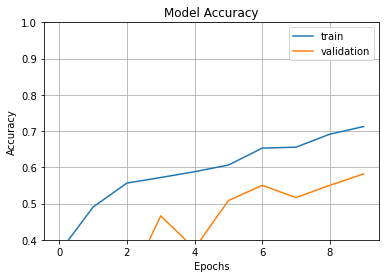

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

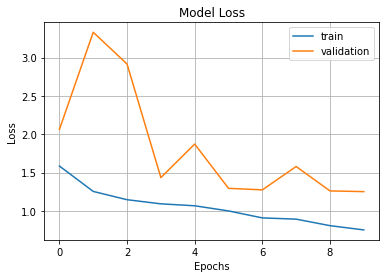

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

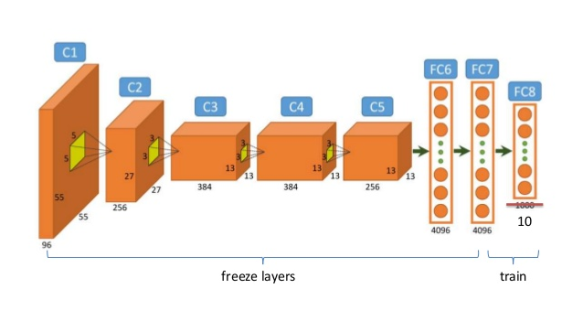


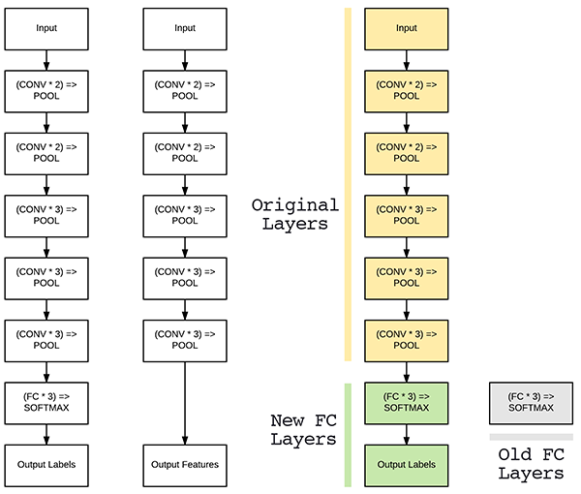

In [ ]:
pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(128, 128, 3),
                   pooling='avg', classes=5,
                   weights='imagenet')

for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model = Sequential()
resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(5, activation='softmax'))


resnet_model.compile(optimizer=Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
start = time.process_time()
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

print("Time Elapsed -- ", time.process_time() - start)

Epoch 1/10
92/92 [==============================] - 12s 86ms/step - loss: 0.8428 - accuracy: 0.7418 - val_loss: 0.4984 - val_accuracy: 0.8256
Epoch 2/10
92/92 [==============================] - 7s 67ms/step - loss: 0.2930 - accuracy: 0.8978 - val_loss: 0.4064 - val_accuracy: 0.8569
Epoch 3/10
92/92 [==============================] - 7s 68ms/step - loss: 0.1607 - accuracy: 0.9465 - val_loss: 0.4040 - val_accuracy: 0.8651
Epoch 4/10
92/92 [==============================] - 7s 70ms/step - loss: 0.0856 - accuracy: 0.9745 - val_loss: 0.5010 - val_accuracy: 0.8474
Epoch 5/10
92/92 [==============================] - 7s 71ms/step - loss: 0.0442 - accuracy: 0.9905 - val_loss: 0.4402 - val_accuracy: 0.8706
Epoch 6/10
92/92 [==============================] - 7s 72ms/step - loss: 0.0160 - accuracy: 0.9993 - val_loss: 0.4567 - val_accuracy: 0.8678
Epoch 7/10
92/92 [==============================] - 7s 69ms/step - loss: 0.0091 - accuracy: 1.0000 - val_loss: 0.4560 - val_accuracy: 0.8733
Epoch 8/10
9

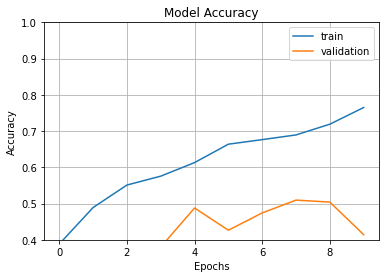

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

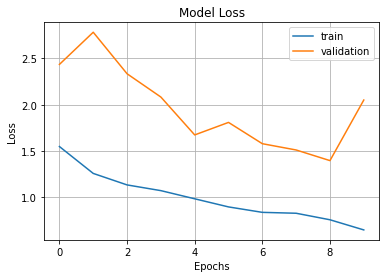

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

## Another Computer Vision Example

#### Cats vs Dogs

In [ ]:
! curl -O https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
! unzip -q kagglecatsanddogs_3367a.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  786M  100  786M    0     0   195M      0  0:00:04  0:00:04 --:--:--  195M


In [ ]:
# Remove corrupted images
num_skipped = 0
for folder_name in ("Cat", "Dog"):
    folder_path = os.path.join("PetImages", folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            # Delete corrupted image
            os.remove(fpath)

print("Deleted %d images" % num_skipped)

Deleted 1590 images


In [ ]:
image_size = (128, 128)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "PetImages",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "PetImages",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 23410 files belonging to 2 classes.
Using 18728 files for training.
Found 23410 files belonging to 2 classes.
Using 4682 files for validation.


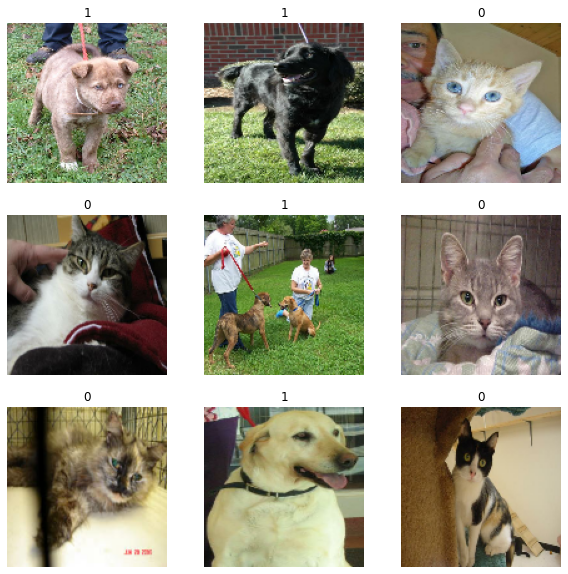

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [ ]:
## Apply Data Augmentation
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.2),
    ]
)


plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
input_shape=image_size + (3,)
inputs = keras.Input(shape=input_shape)
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)

In [ ]:
train_ds = train_ds.prefetch(buffer_size=32)
val_ds = val_ds.prefetch(buffer_size=32)

In [ ]:
pretrained_model= tf.keras.applications.ResNet50(
                   input_shape=(128, 128, 3),
                   pooling='avg', classes=2,
                   weights=None)

pretrained_model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

In [ ]:
start = time.process_time()
history = pretrained_model.fit(
    train_ds, epochs=epochs, validation_data=val_ds,
)

print("Time Elapsed -- ", time.process_time() - start)

Epoch 1/10
586/586 [==============================] - 93s 147ms/step - loss: 0.7399 - accuracy: 0.6331 - val_loss: 0.7747 - val_accuracy: 0.5607
Epoch 2/10
586/586 [==============================] - 84s 143ms/step - loss: 0.5824 - accuracy: 0.7031 - val_loss: 0.6509 - val_accuracy: 0.6610
Epoch 3/10
586/586 [==============================] - 84s 143ms/step - loss: 0.4925 - accuracy: 0.7666 - val_loss: 1.0169 - val_accuracy: 0.5331
Epoch 4/10
586/586 [==============================] - 84s 143ms/step - loss: 0.4277 - accuracy: 0.8055 - val_loss: 0.4852 - val_accuracy: 0.7691
Epoch 5/10
586/586 [==============================] - 84s 143ms/step - loss: 0.4474 - accuracy: 0.7962 - val_loss: 0.7770 - val_accuracy: 0.5959
Epoch 6/10
586/586 [==============================] - 84s 142ms/step - loss: 0.3582 - accuracy: 0.8445 - val_loss: 0.5196 - val_accuracy: 0.7317
Epoch 7/10
586/586 [==============================] - 84s 143ms/step - loss: 0.2767 - accuracy: 0.8799 - val_loss: 0.4695 - val_ac

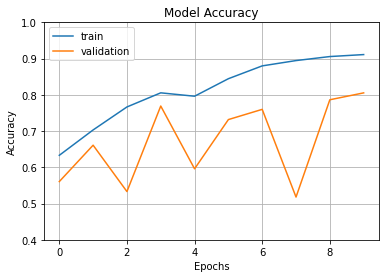

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

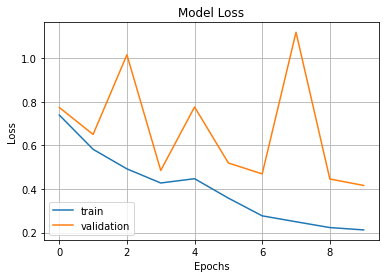

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(128, 128, 3),
                   pooling='avg', classes=2,
                   weights='imagenet')

for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model = Sequential()
resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(2, activation='softmax'))


resnet_model.compile(optimizer=Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
start = time.process_time()
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

print("Time Elapsed -- ", time.process_time() - start)

Epoch 1/10
586/586 [==============================] - 41s 65ms/step - loss: 0.2325 - accuracy: 0.9270 - val_loss: 0.1386 - val_accuracy: 0.9438
Epoch 2/10
586/586 [==============================] - 42s 71ms/step - loss: 0.1202 - accuracy: 0.9514 - val_loss: 0.1255 - val_accuracy: 0.9507
Epoch 3/10
586/586 [==============================] - 41s 70ms/step - loss: 0.0983 - accuracy: 0.9602 - val_loss: 0.1422 - val_accuracy: 0.9425
Epoch 4/10
586/586 [==============================] - 41s 69ms/step - loss: 0.0797 - accuracy: 0.9695 - val_loss: 0.2055 - val_accuracy: 0.9280
Epoch 5/10
586/586 [==============================] - 42s 71ms/step - loss: 0.0610 - accuracy: 0.9764 - val_loss: 0.3045 - val_accuracy: 0.9069
Epoch 6/10
586/586 [==============================] - 41s 69ms/step - loss: 0.0528 - accuracy: 0.9816 - val_loss: 0.2056 - val_accuracy: 0.9321
Epoch 7/10
586/586 [==============================] - 38s 65ms/step - loss: 0.0402 - accuracy: 0.9847 - val_loss: 0.2041 - val_accuracy:

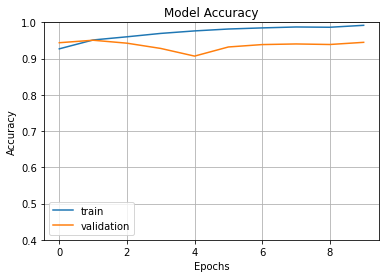

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

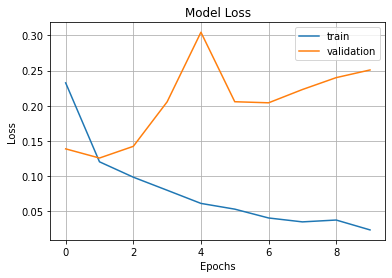

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

# Transfer Learning in NLP

### Pretrained word embeddings

A word embedding is a learned representation for text where words that have the same meaning have a similar representation.

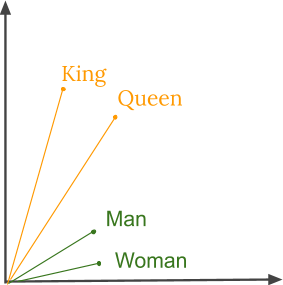


Word embeddings are vectors whose relative similarities correlate with semantic similarity. Such vectors are used both as an end in itself (for computing similarities between terms), and as a representational basis for downstream NLP tasks like text classification, document clustering, part of speech tagging, named entity recognition, sentiment analysis, and so on.


### Goal of Word Embeddings

* To reduce dimensionality
* To use a word to predict the words around it
* Inter word semantics must be captured


### How are Word Embeddings used?

* They are used as input to machine learning models.
Take the words —-> Give their numeric representation —-> Use in training or inference
* To represent or visualize any underlying patterns of usage in the corpus that was used to train them.


### Examples of word embeddings:

* GloVe(Global Vectors for Word Representation) by Stanford
* Google’s Word2vec trained on around 1000 billion words from Google News
* Fasttext English vectors 


### Benefits of using Word Embeddings:

* It is much faster to train than hand build models like WordNet(which uses graph embeddings)
* Almost all modern NLP applications start with an embedding layer
* It Stores an approximation of meaning

### Drawbacks:

* It can be memory intensive
* It is corpus dependent. Any underlying bias will have an effect on your model
* It cannot distinguish between homophones. Eg: brake/break, cell/sell, weather/whether etc.

### Sentiment Analysis Dataset

In [ ]:
! wget --no-check-certificate https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P -O /tmp/sentiment.csv -O /tmp/sentiment.csv
df = pd.read_csv('/tmp/sentiment.csv')

--2022-04-14 19:20:42--  https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P
Resolving drive.google.com (drive.google.com)... 173.194.217.139, 173.194.217.100, 173.194.217.101, ...
Connecting to drive.google.com (drive.google.com)|173.194.217.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/fv1ajccerut7vj9d4664u2ebavcv1gqf/1649964000000/11118900490791463723/*/13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P [following]
--2022-04-14 19:20:42--  https://doc-08-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/fv1ajccerut7vj9d4664u2ebavcv1gqf/1649964000000/11118900490791463723/*/13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P
Resolving doc-08-ak-docs.googleusercontent.com (doc-08-ak-docs.googleusercontent.com)... 173.194.210.132, 2607:f8b0:400c:c0f::84
Connecting to doc-08-ak-docs.googleusercontent.com (doc-08-ak-docs.googleusercontent.com)|173.194.2

In [ ]:
df.head()

Unnamed: 0                                               text  sentiment
0           0  So there is no way for me to plug it in here i...          0
1           1                         Good case Excellent value.          1
2           2                             Great for the jawbone.          1
3           3  Tied to charger for conversations lasting more...          0
4           4                                  The mic is great.          1

In [ ]:
X = df['text']
y = df['sentiment']


X_train, X_test , y_train, y_test = train_test_split(X, y , test_size = 0.20)

#### Tokenizing the words

In [ ]:
max_length = 100

vocab_size = 10000
oov_token = "<OOV>"
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(X_train)

In [ ]:
word_index = tokenizer.word_index
word_index

{'<OOV>': 1,
 'the': 2,
 'and': 3,
 'i': 4,
 'a': 5,
 'to': 6,
 'it': 7,
 'is': 8,
 'was': 9,
 'this': 10,
 'of': 11,
 'not': 12,
 'for': 13,
 'my': 14,
 'in': 15,
 'good': 16,
 'with': 17,
 'very': 18,
 'great': 19,
 'phone': 20,
 'that': 21,
 'have': 22,
 'on': 23,
 'food': 24,
 'you': 25,
 'so': 26,
 'had': 27,
 'service': 28,
 'are': 29,
 'place': 30,
 'but': 31,
 'be': 32,
 'we': 33,
 'as': 34,
 'all': 35,
 'at': 36,
 'back': 37,
 'like': 38,
 'one': 39,
 'here': 40,
 'time': 41,
 'were': 42,
 'they': 43,
 'really': 44,
 'quality': 45,
 'would': 46,
 'product': 47,
 'if': 48,
 'well': 49,
 'will': 50,
 'best': 51,
 'from': 52,
 'no': 53,
 'just': 54,
 'your': 55,
 'go': 56,
 'an': 57,
 'up': 58,
 'there': 59,
 'me': 60,
 'works': 61,
 "i've": 62,
 'only': 63,
 'battery': 64,
 "it's": 65,
 'headset': 66,
 'nice': 67,
 'also': 68,
 "don't": 69,
 'sound': 70,
 'than': 71,
 'has': 72,
 'out': 73,
 'use': 74,
 'ever': 75,
 'get': 76,
 'our': 77,
 'when': 78,
 "i'm": 79,
 'what': 80,
 '

#### Let’s convert the words to sequences so that a complete sequence of numbers can represent every sentence. This is done using `texts_to_sequences` from the tokenizer.



Since the sentences have different lengths, the sequences will also have different lengths. But, the sequences need to have an equal length for the machine learning model. This can be achieved by truncating longer sentences and padding shorter ones with zeros. 



In [ ]:
X_train_sequences = np.array(tokenizer.texts_to_sequences(X_train))
X_test_sequences = np.array(tokenizer.texts_to_sequences(X_test))

X_train_sequences = pad_sequences(X_train_sequences, maxlen=max_length)
X_test_sequences = pad_sequences(X_test_sequences, maxlen=max_length)

In [ ]:
model = Sequential([
    Embedding(200, 20),
    Bidirectional(LSTM(150, return_sequences=True)), 
    Bidirectional(LSTM(150)),
    Dense(6, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
num_epochs = 10

start = time.process_time()
history = model.fit(X_train_sequences, y_train, epochs=num_epochs, validation_data=(X_test_sequences, y_test))
print("Time Elapsed -- ", time.process_time() - start)

Epoch 1/10
50/50 [==============================] - 10s 91ms/step - loss: 0.6919 - accuracy: 0.5461 - val_loss: 0.6490 - val_accuracy: 0.6767
Epoch 2/10
50/50 [==============================] - 2s 48ms/step - loss: 0.5621 - accuracy: 0.7106 - val_loss: 0.5313 - val_accuracy: 0.7343
Epoch 3/10
50/50 [==============================] - 2s 38ms/step - loss: 0.4922 - accuracy: 0.7640 - val_loss: 0.5689 - val_accuracy: 0.7018
Epoch 4/10
50/50 [==============================] - 2s 35ms/step - loss: 0.4860 - accuracy: 0.7621 - val_loss: 0.5695 - val_accuracy: 0.7093
Epoch 5/10
50/50 [==============================] - 2s 33ms/step - loss: 0.4229 - accuracy: 0.8004 - val_loss: 0.4967 - val_accuracy: 0.7218
Epoch 6/10
50/50 [==============================] - 2s 33ms/step - loss: 0.4182 - accuracy: 0.7960 - val_loss: 0.4998 - val_accuracy: 0.7343
Epoch 7/10
50/50 [==============================] - 2s 37ms/step - loss: 0.4228 - accuracy: 0.7878 - val_loss: 0.5135 - val_accuracy: 0.7268
Epoch 8/10
5

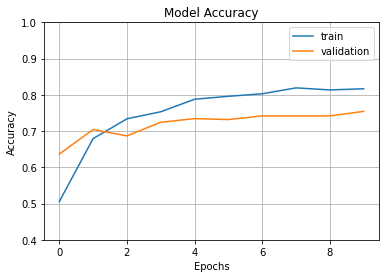

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

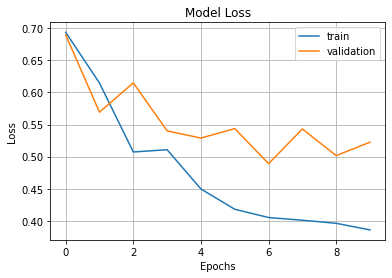

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

### Using GLOVE Embeddings

GloVe stands for global vectors for word representation. It is an unsupervised learning algorithm developed by Stanford for generating word embeddings by aggregating global word-word co-occurrence matrix from a corpus. 


In [ ]:
! wget --no-check-certificate http://nlp.stanford.edu/data/glove.6B.zip -O /tmp/glove.6B.zip

--2022-04-14 19:50:30--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-04-14 19:50:30--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-04-14 19:50:30--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘/tmp/glove.6B.zip’

/t

In [ ]:
with zipfile.ZipFile('/tmp/glove.6B.zip', 'r') as zip_ref:
    zip_ref.extractall('/tmp/glove')

In [ ]:
embeddings_index = {}
f = open('/tmp/glove/glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [ ]:
embedding_matrix = np.zeros((len(word_index) + 1, max_length))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [ ]:
embeddings_index.get("bakery")

array([ 0.65338 , -0.48826 , -0.96203 ,  0.12876 , -0.066009,  0.35584 ,
        0.87038 ,  0.082484,  0.63744 ,  0.59165 , -0.071872, -0.42634 ,
        0.6208  ,  0.53574 , -0.75046 ,  0.54235 ,  0.084453, -0.087891,
       -0.6963  ,  0.11833 ,  0.4091  ,  0.61802 , -0.064203, -0.33163 ,
       -0.11668 ,  0.29574 , -0.016417, -0.33945 , -0.64799 , -0.084653,
       -0.45035 ,  0.3933  ,  0.34923 ,  0.14814 , -0.21261 ,  0.8639  ,
        0.411   , -0.063047,  0.98473 , -1.0244  ,  0.75131 , -0.29196 ,
        0.1307  , -0.39473 ,  0.47416 ,  0.040569, -0.38155 ,  0.33777 ,
        0.66635 ,  0.5628  , -0.80187 , -0.072858, -0.53021 ,  0.27421 ,
       -1.0243  , -0.44655 , -1.1728  ,  0.27071 ,  0.40312 , -0.20869 ,
        0.56319 , -0.023375,  0.71878 , -0.35353 ,  0.16581 , -0.65445 ,
        1.0595  , -0.23497 , -0.070307, -0.41912 , -0.80562 ,  0.14196 ,
        0.16127 , -0.052105,  0.20969 ,  0.44239 ,  0.25827 , -0.21261 ,
       -0.15155 ,  0.11842 ,  0.089263,  0.39874 , 

## Create the embedding layer

At this point, you can create the embedding layer. Here are a couple of things to note:

* setting `trainable` to false is crucial because you want to make sure that this layer isn’t re-trained;
* weights are set to the embedding matrix you just created;
`len(word_index) + 1` is the size of the vocabulary with one added because zero is reserved for padding;
`input_length` is the length of input sequences.

In [ ]:
embedding_layer = Embedding(len(word_index) + 1,
                            max_length,
                            weights=[embedding_matrix],
                            input_length=max_length,
                            trainable=False)

In [ ]:
model = Sequential([
    embedding_layer,
    Bidirectional(LSTM(150, return_sequences=True)), 
    Bidirectional(LSTM(150)),
    Dense(6, activation='relu'),
   Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

start = time.process_time()
history = model.fit(X_train_sequences, y_train, epochs=num_epochs, validation_data=(X_test_sequences, y_test))
print("Time Elapsed -- ", time.process_time() - start)

Epoch 1/10
50/50 [==============================] - 9s 64ms/step - loss: 0.6415 - accuracy: 0.6290 - val_loss: 0.5525 - val_accuracy: 0.7494
Epoch 2/10
50/50 [==============================] - 2s 33ms/step - loss: 0.5291 - accuracy: 0.7677 - val_loss: 0.5774 - val_accuracy: 0.7018
Epoch 3/10
50/50 [==============================] - 2s 34ms/step - loss: 0.4549 - accuracy: 0.7966 - val_loss: 0.4551 - val_accuracy: 0.7769
Epoch 4/10
50/50 [==============================] - 2s 32ms/step - loss: 0.4010 - accuracy: 0.8267 - val_loss: 0.4496 - val_accuracy: 0.7845
Epoch 5/10
50/50 [==============================] - 2s 33ms/step - loss: 0.3810 - accuracy: 0.8362 - val_loss: 0.4504 - val_accuracy: 0.7644
Epoch 6/10
50/50 [==============================] - 2s 33ms/step - loss: 0.3697 - accuracy: 0.8399 - val_loss: 0.4112 - val_accuracy: 0.7970
Epoch 7/10
50/50 [==============================] - 2s 34ms/step - loss: 0.3162 - accuracy: 0.8694 - val_loss: 0.4376 - val_accuracy: 0.7870
Epoch 8/10
50

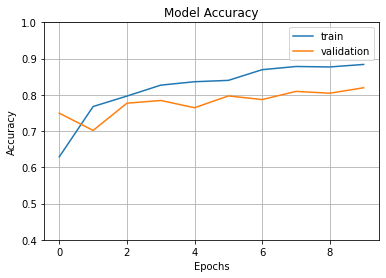

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

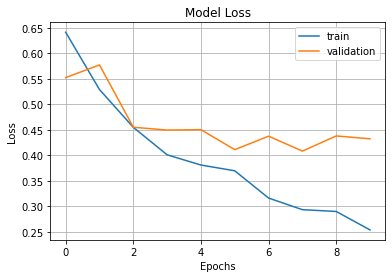

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

### There are 3 ways to use pretrained models

* prediction,
* feature extraction
* fine-tuning


#### Prediction

* We saw an example of this when we used a pretrained ResNet50 model to predict Cats VS Dogs & also for the Flower Classification task. 

* The ResNet50 model was pretrained on ImageNet which contains over a million images, and 1000 classes. 


#### Feature Extraction

* We use a pretrained Glove embedding on Wikipedia text with a vocabulary size of 400K as a feature extractor for a sentiment classification task. 


#### Fine-Tuning

* Fine-tuning is an approach to transfer learning where you change the model output to fit a new task and train only the output model.


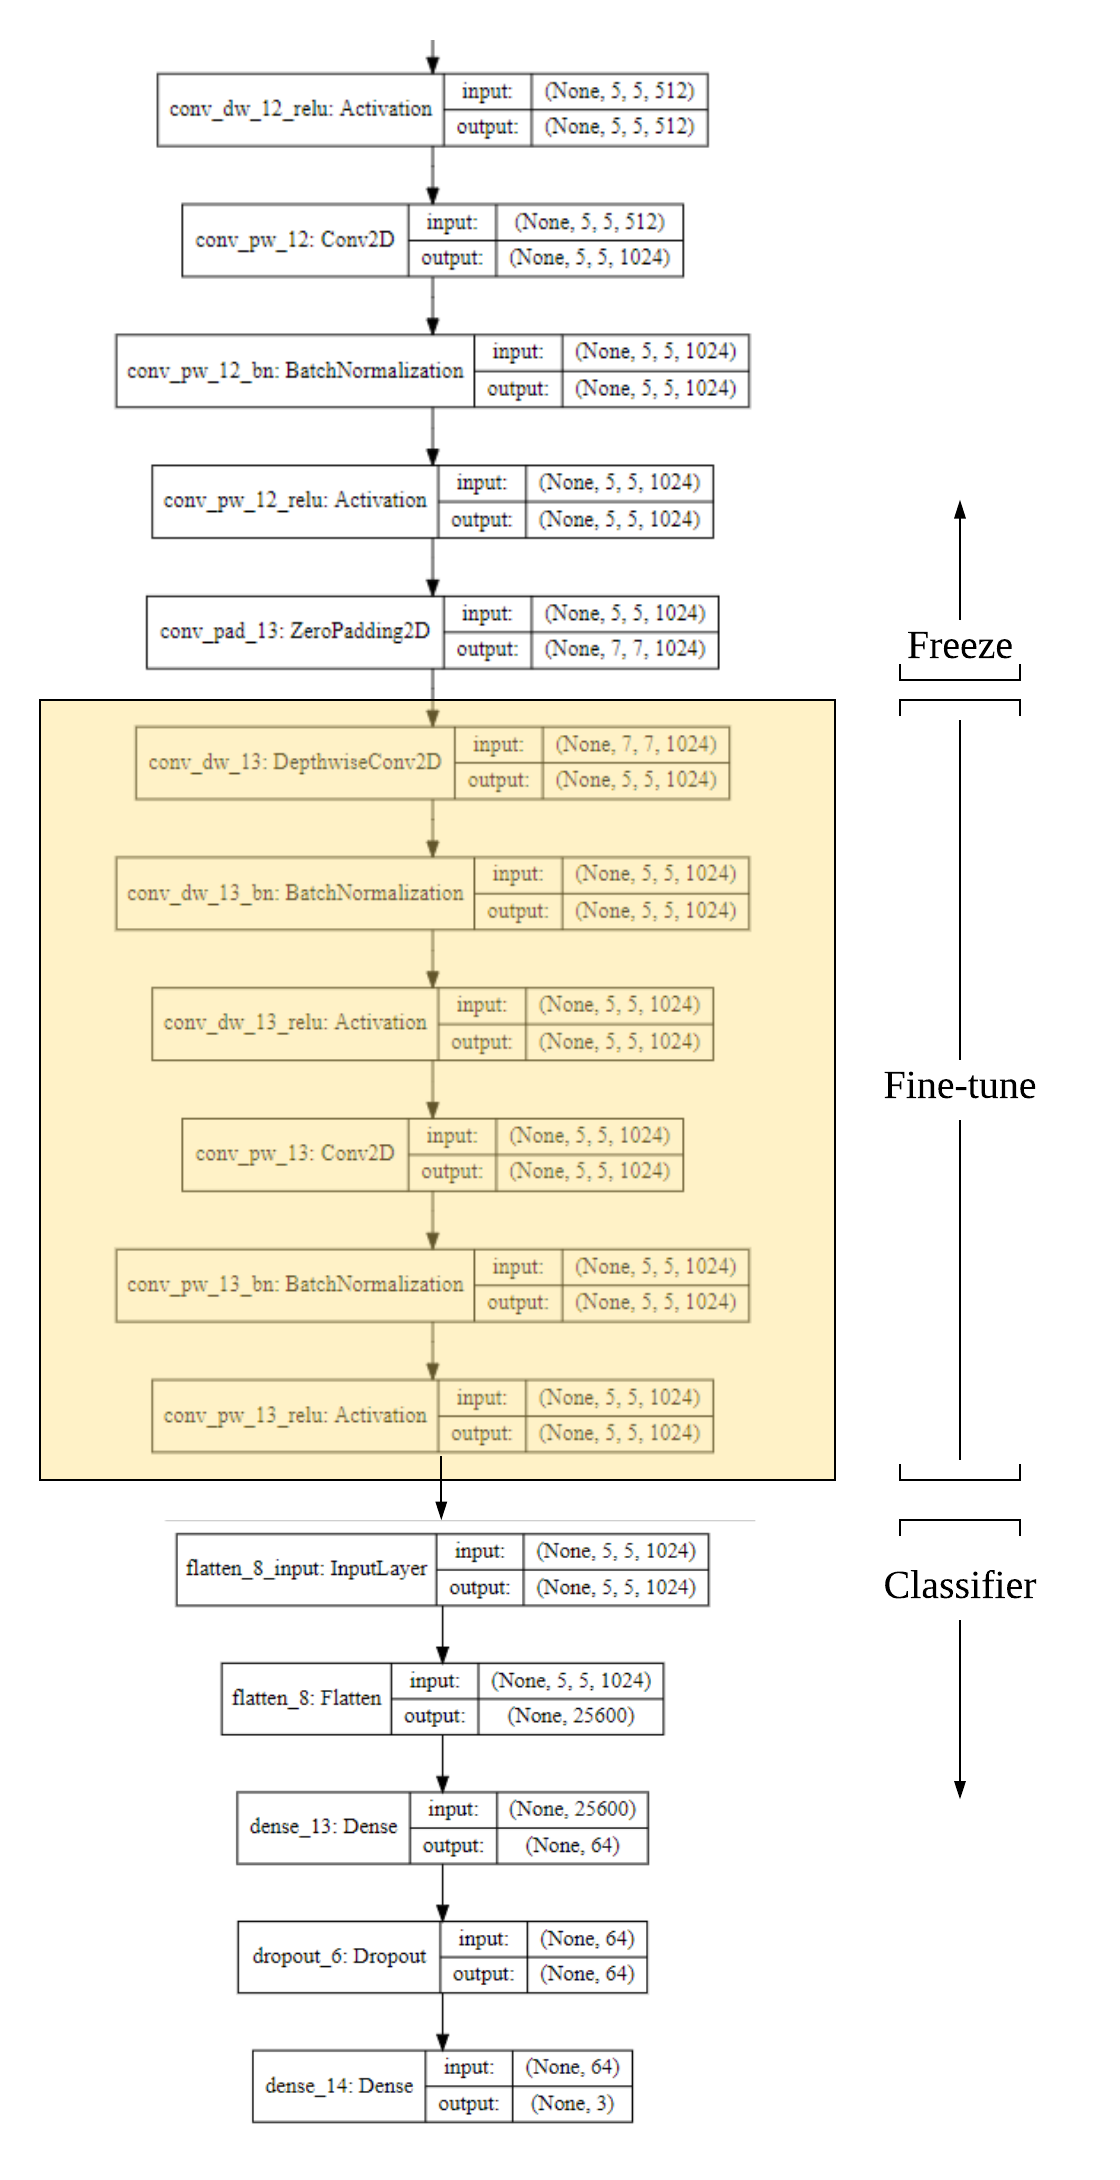

# Self-Supervised Learning


Before we delve into self-supervised learning, we should discuss data annotation. 


### Data Annotation

Building an AI or ML model that acts like a human requires large volumes of training data. For a model to make decisions and take action, it must be trained to understand specific information. Data annotation is the categorization and labeling of data for AI applications. Training data must be properly categorized and annotated for a specific use case. With high-quality, human-powered data annotation, companies can build and improve AI implementations. The result is an enhanced customer experience solution such as product recommendations, relevant search engine results, computer vision, speech recognition, chatbots, and more.

There are several primary types of data: 


> Text Annotation

* The most commonly used data type is `text` – according to the 2020 State of AI and Machine Learning report, 70% of companies rely on text. Examples include Named Entity, Intent, and Semantic `Annotation`.


> Audio Annotation

* Audio annotation is the transcription and time-stamping of speech data, including the transcription of specific pronunciation and intonation, along with the identification of language, dialect, and speaker demographics. Every use case is different, and some require a very specific approach: for example, the tagging of aggressive speech indicators and non-speech sounds like glass breaking for use in security and emergency hotline technology applications.



> Image Annotation

* Image annotation is vital for a wide range of applications, including computer vision, robotic vision, facial recognition, and solutions that rely on machine learning to interpret images. To train these solutions, metadata must be assigned to the images in the form of identifiers, captions, or keywords.

Examples include Image Segmentation, Object Detection, Image Classification e.t.c


> Video Annotation


* Human-annotated data is the key to successful machine learning. Humans are simply better than computers at managing subjectivity, understanding intent, and coping with ambiguity. For example, when determining whether a search engine result is relevant, input from many people is needed for consensus. When training a computer vision or pattern recognition solution, humans are needed to identify and annotate specific data, such as outlining all the pixels containing trees or traffic signs in an image. Using this structured data, machines can learn to recognize these relationships in testing and production.



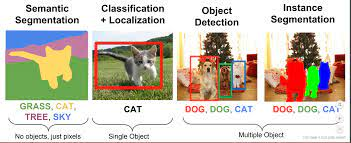

Self-supervised learning is a representation learning method where a supervised task is created out of the unlabelled data. Self-supervised learning is used to reduce the data labelling cost and leverage the unlabelled data pool.

## The Transformer Architecture

The Transformer was first introduced in 2017 in the paper “Attention is all you need”. 

A transformer is a deep learning model that adopts the mechanism of self-attention, differentially weighting the significance of each part of the input data. The Transformer architecture is now the model of choice for NLP problems replacing RNN models such as long short-term memory (LSTM) and increasingly so for Computer Vision.

Like recurrent neural networks (RNNs), transformers are designed to handle sequential input data, such as natural language, for tasks such as translation and text summarization. How ever, unlike RNNs, transformers do not necessarily process the data in order. 

Rather, the attention mechanism provides context for any position in the input sequence. For example, if the input data is a natural language sentence, the transformer does not need to process the beginning of the sentence before the end. Rather it identifies the context that confers meaning to each word in the sentence. This feature allows for more parallelization than RNNs and therefore reduces training times.


The additional training parallelization allows training on larger datasets than was once possible. This led to the development of pretrained systems such as BERT (Bidirectional Encoder Representations from Transformers) and GPT (Generative Pre-trained Transformer), which were trained with large language datasets, such as the Wikipedia Corpus and Common Crawl, and can be fine-tuned for specific tasks.

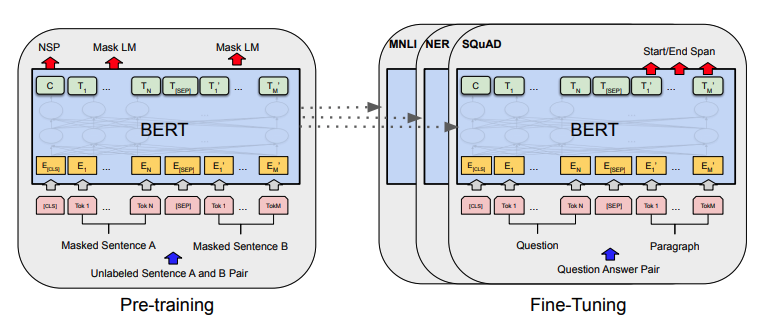


# Training Process

Transformers typically undergo semi-supervised learning involving unsupervised pretraining followed by supervised fine-tuning. Pretraining is typically done on a larger dataset than fine-tuning, due to the limited availability of labeled training data. 


## Pretraining Stage
Let's use BERT as an example, BERT was pretrained on two tasks: 

* Masked language modeling (MLM): taking a sentence, the model randomly masks 15% of the words in the input then run the entire masked sentence through the model and has to predict the masked words. This is different from traditional recurrent neural networks (RNNs) that usually see the words one after the other, or from autoregressive models like GPT which internally mask the future tokens. It allows the model to learn a bidirectional representation of the sentence.

* Next sentence prediction (NSP): the models concatenates two masked sentences as inputs during pretraining. Sometimes they correspond to sentences that were next to each other in the original text, sometimes not. The model then has to predict if the two sentences were following each other or not.


As a result of this training process, BERT learns contextual embeddings for words. 




## Finetuning Stage


After pretraining, which is computationally expensive, BERT can be finetuned with less resources on smaller datasets to optimize its performance on specific tasks.

This way, the model learns an inner representation of the English language that can then be used to extract features useful for downstream tasks: if you have a dataset of labeled sentences for instance, you can train a standard classifier using the features produced by the BERT model as inputs.


Tasks for pretraining and fine-tuning commonly include:

* language modeling
* question answering
* reading comprehension
* sentiment analysis
* paraphrasing


The BERT model was pretrained on BookCorpus, a dataset consisting of 11,038 unpublished books and English Wikipedia (excluding lists, tables and headers).


BERT Base: 110 million parameters
BERT Large: 340 million parameters

### LayoutLM

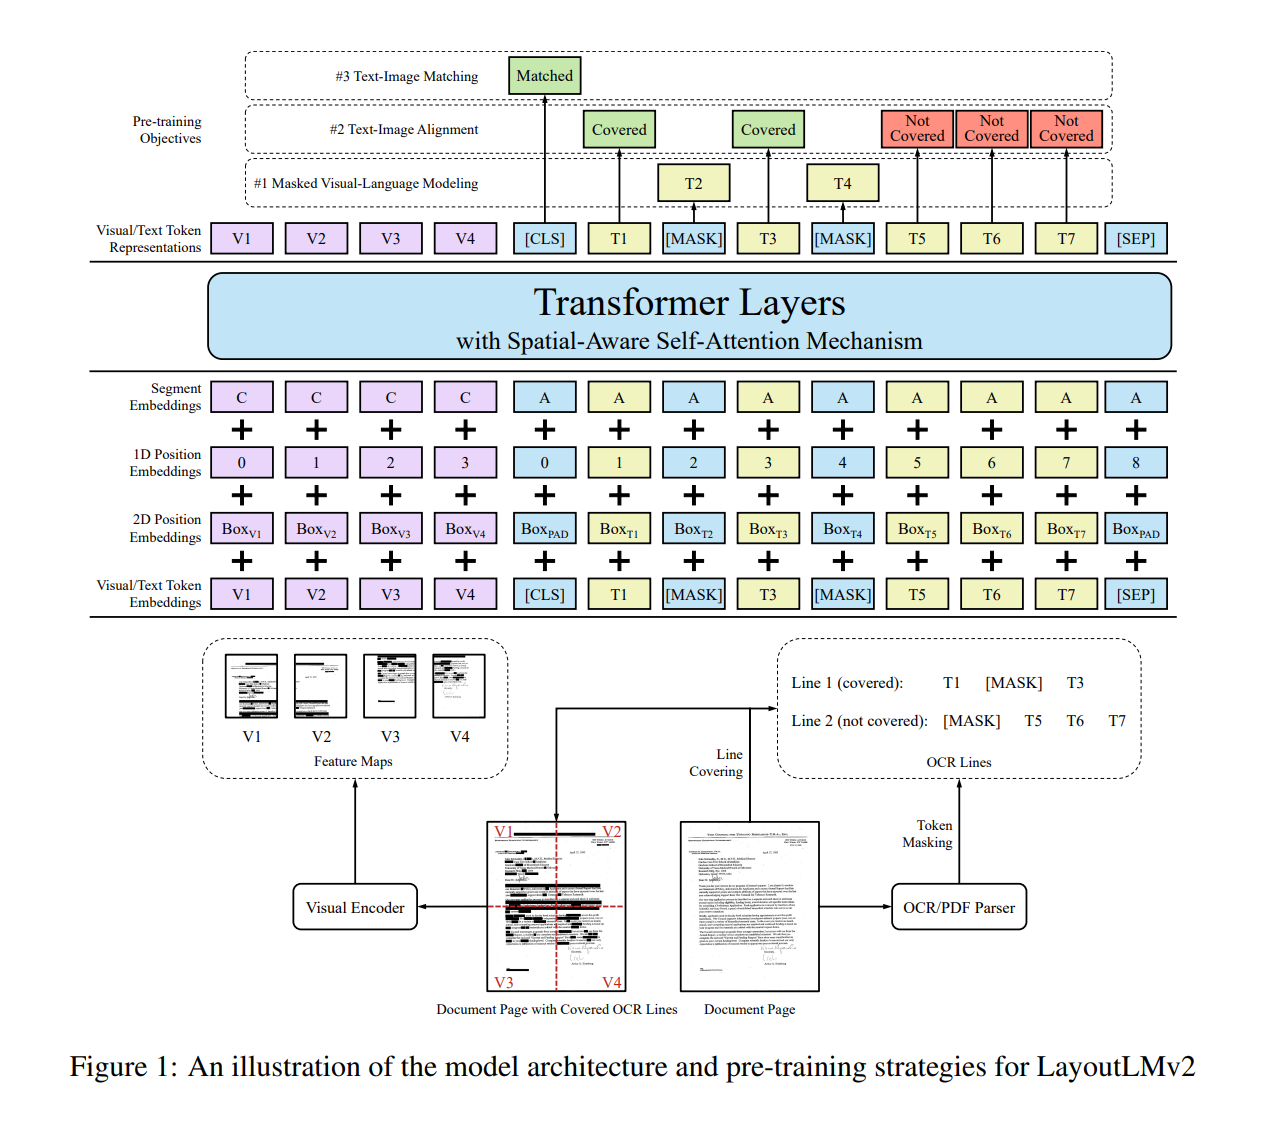

The LayoutLM model is based on BERT architecture but with two additional types of input embeddings. The first is a 2-D position embedding that denotes the relative position of a token within a document, and the second is an image embedding for scanned token images within a document.


The architecture jointly models the interaction between text and layout information across scanned document images, which is beneficial for a great number of real-world document image understanding tasks such as information extraction from scanned documents. It also leverages the image features to incorporate the style information of words in LayoutLM.


It leverages the output feature map of ResNeXt-FPN, a CNN-based visual encoder as the backbone of the visual
encoder, which converts the page image to a fixed-length sequence. 

This model was chosen as an example because it leverages transfer learning across modalities- NLP & Vision. ResNext-FPN for Vision, and BERT for Text. 



### Masked Visual-Language Modeling (MVLM) 

* Some text tokens are masked and the model is asked to recover said tokens to make the model learn better in the language side with the crossmodality clues.



### Text-Image Alignment 

* To help the model learn
the spatial location correspondence between image
and coordinates of bounding boxes, we propose
the Text-Image Alignment (TIA) as a fine-grained
cross-modality alignment task. In the TIA task,
some tokens lines are randomly selected, and their
image regions are covered on the document image.


### Text-Image Matching 

Furthermore, a coarsegrained cross-modality alignment task, Text-Image Matching (TIM) is applied to help the model learn
the correspondence between document image and
textual content.

## LayoutLM for Sequence Classification

In [ ]:
# Get Data
def download_data():
    url = "https://www.dropbox.com/s/kuw05qmc4uy474d/RVL_CDIP_one_example_per_class.zip?dl=1"
    r = requests.get(url)
    z = zipfile.ZipFile(io.BytesIO(r.content))
    z.extractall()

download_data()

### View Document Image

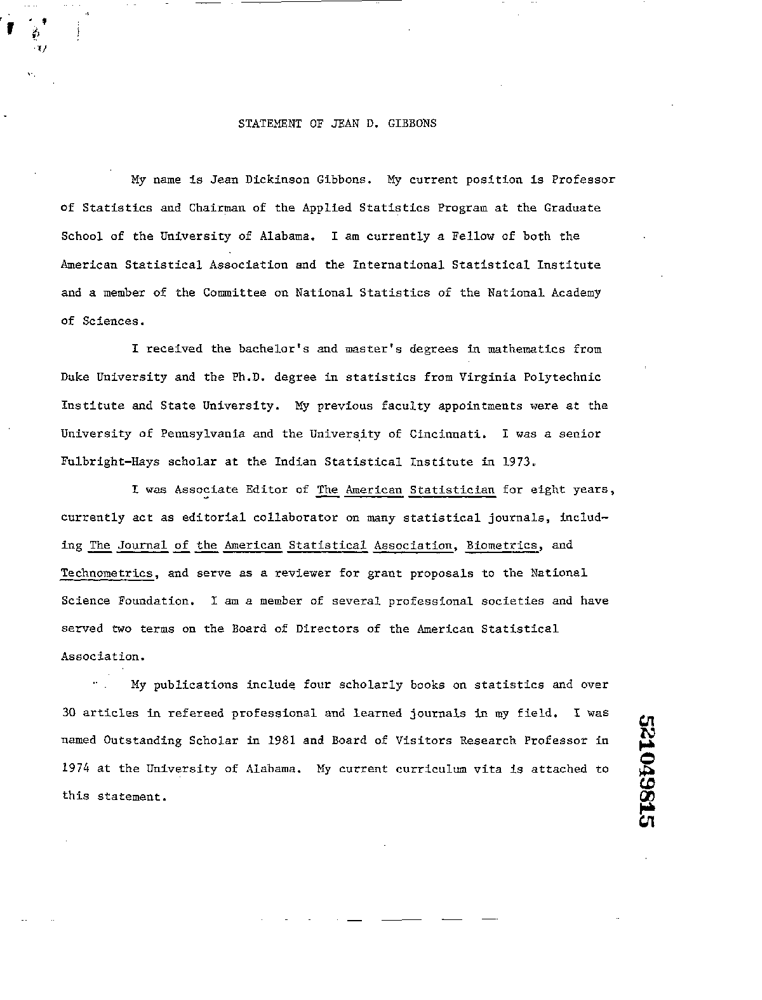

In [ ]:
image = Image.open("/content/RVL_CDIP_one_example_per_class/resume/0000157402.tif")
image = image.convert("RGB")
image

### Use Tesseract to extract words and bboxes

In [ ]:
ocr_df = pytesseract.image_to_data(image, output_type='data.frame')
ocr_df = ocr_df.dropna().reset_index(drop=True)
float_cols = ocr_df.select_dtypes('float').columns
ocr_df[float_cols] = ocr_df[float_cols].round(0).astype(int)
ocr_df = ocr_df.replace(r'^\s*$', np.nan, regex=True)
words = ' '.join([word for word in ocr_df.text if str(word) != 'nan'])
words

"ot uv STATEMENT OF JEAN D, GIBBONS My name 4s Jean Dickinson Gibbons. My current position is Professor of Statistics and Chairman of the Applied Statistics Program at the Graduate School of the University of Alabana, I am currently a Fellow of both the American Statistical Association and the International Statistical Institute and a menber of the Committee on National Statistics of the National, Acadeny of Scdences. I received the bachelor's and master's degrees in mathematics from Duke University and the Ph.D. degree in statistics from Virginia Polytechnic Institute and State University. My previous faculty appointments were at the University of Pennsylvania and the University of Cincinnati. I was a senior Fulbright-Hays scholar at the Indian Statistical Institute in 1973. Twas Associate Editor of The Anertcan Statistician for eight years, currently act as editortal collaborator on many statistical journals, includ~ Technometrics, and serve as a reviewer for grant proposals to the N

### Using HuggingFace processor

In [ ]:
feature_extractor = LayoutLMv2FeatureExtractor()
tokenizer = LayoutLMv2Tokenizer.from_pretrained("microsoft/layoutlmv2-base-uncased")
processor = LayoutLMv2Processor(feature_extractor, tokenizer)


encoded_inputs = processor(image, return_tensors="pt")

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/707 [00:00<?, ?B/s]

In [ ]:
for k,v in encoded_inputs.items():
  print(k, v.shape)

input_ids torch.Size([1, 286])
bbox torch.Size([1, 286, 4])
token_type_ids torch.Size([1, 286])
attention_mask torch.Size([1, 286])
image torch.Size([1, 3, 224, 224])


### Classification Labels

In [ ]:
dataset_path = "/content/RVL_CDIP_one_example_per_class"
labels = [label for label in os.listdir(dataset_path)]
id2label = {v: k for v, k in enumerate(labels)}
label2id = {k: v for v, k in enumerate(labels)}
label2id

{'advertisement': 7,
 'budget': 5,
 'email': 14,
 'file_folder': 4,
 'form': 6,
 'invoice': 13,
 'letter': 2,
 'memo': 11,
 'news_article': 3,
 'presentation': 0,
 'questionnaire': 8,
 'resume': 1,
 'scientific_publication': 12,
 'scientific_report': 10,
 'specification': 9}

In [ ]:
images = []
labels = []

for label_folder, _, file_names in os.walk(dataset_path):
  if label_folder != dataset_path:
    label = label_folder[40:]
    for _, _, image_names in os.walk(label_folder):
      relative_image_names = []
      for image_file in image_names:
        relative_image_names.append(dataset_path + "/" + label + "/" + image_file)
      images.extend(relative_image_names)
      labels.extend([label] * len (relative_image_names)) 

data = pd.DataFrame.from_dict({'image_path': images, 'label': labels})
data.head()

image_path         label
0  /content/RVL_CDIP_one_example_per_class/presen...  presentation
1  /content/RVL_CDIP_one_example_per_class/resume...        resume
2  /content/RVL_CDIP_one_example_per_class/letter...        letter
3  /content/RVL_CDIP_one_example_per_class/news_a...  news_article
4  /content/RVL_CDIP_one_example_per_class/file_f...   file_folder

In [ ]:
# read dataframe as HuggingFace Datasets object
dataset = Dataset.from_pandas(data)

In [ ]:


# we need to define custom features
features = Features({
    'image': Array3D(dtype="int64", shape=(3, 224, 224)),
    'input_ids': Sequence(feature=Value(dtype='int64')),
    'attention_mask': Sequence(Value(dtype='int64')),
    'token_type_ids': Sequence(Value(dtype='int64')),
    'bbox': Array2D(dtype="int64", shape=(512, 4)),
    'labels': ClassLabel(num_classes=len(labels), names=labels),
})

def preprocess_data(examples):
  # take a batch of images
  images = [Image.open(path).convert("RGB") for path in examples['image_path']]
  encoded_inputs = processor(images, padding="max_length", truncation=True)
  
  # add labels
  encoded_inputs["labels"] = [label2id[label] for label in examples["label"]]

  return encoded_inputs

encoded_dataset = dataset.map(preprocess_data, remove_columns=dataset.column_names, features=features, 
                              batched=True, batch_size=2)

encoded_dataset.set_format(type="torch", device="cuda")

  0%|          | 0/8 [00:00<?, ?ba/s]

In [ ]:
dataloader = torch.utils.data.DataLoader(encoded_dataset, batch_size=4)
batch = next(iter(dataloader))

In [ ]:
for k,v in batch.items():
  print(k, v.shape)

image torch.Size([4, 3, 224, 224])
input_ids torch.Size([4, 512])
attention_mask torch.Size([4, 512])
token_type_ids torch.Size([4, 512])
bbox torch.Size([4, 512, 4])
labels torch.Size([4])


## Define the model


Here we define the model, namely `LayoutLMv2ForSequenceClassification`. We initialize it with the weights of the pre-trained base model (`LayoutLMModel`). The weights of the classification head are randomly initialized, and will be fine-tuned together with the weights of the base model on our tiny dataset. Once loaded, we move it to the GPU.

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = LayoutLMv2ForSequenceClassification.from_pretrained("microsoft/layoutlmv2-base-uncased", 
                                                            num_labels=len(labels))
model.to(device)

Downloading:   0%|          | 0.00/765M [00:00<?, ?B/s]

Some weights of the model checkpoint at microsoft/layoutlmv2-base-uncased were not used when initializing LayoutLMv2ForSequenceClassification: ['layoutlmv2.visual.backbone.bottom_up.res3.0.conv3.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res4.5.conv3.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res4.3.conv2.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res4.19.conv1.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res4.21.conv2.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res4.20.conv2.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res4.0.conv3.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res4.12.conv2.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res4.16.conv1.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res4.4.conv3.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res2.0.conv2.norm.num_batches_tra

LayoutLMv2ForSequenceClassification(
  (layoutlmv2): LayoutLMv2Model(
    (embeddings): LayoutLMv2Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (x_position_embeddings): Embedding(1024, 128)
      (y_position_embeddings): Embedding(1024, 128)
      (h_position_embeddings): Embedding(1024, 128)
      (w_position_embeddings): Embedding(1024, 128)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (visual): LayoutLMv2VisualBackbone(
      (backbone): FPN(
        (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
        (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
        (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

## Train Model

In [ ]:


optimizer = AdamW(model.parameters(), lr=5e-5)

global_step = 0
num_train_epochs = 10
t_total = len(dataloader) * num_train_epochs # total number of training steps 

#put the model in training mode
model.train()
for epoch in range(num_train_epochs):
  print("Epoch:", epoch)
  running_loss = 0.0
  correct = 0
  for batch in tqdm(dataloader):
      # forward pass
      outputs = model(**batch)
      loss = outputs.loss

      running_loss += loss.item()
      predictions = outputs.logits.argmax(-1)
      correct += (predictions == batch['labels']).float().sum()

      # backward pass to get the gradients 
      loss.backward()

      # update
      optimizer.step()
      optimizer.zero_grad()
      global_step += 1
  
  print("Loss:", running_loss / batch["input_ids"].shape[0])
  accuracy = 100 * correct / len(data)
  print("Training accuracy:", accuracy.item())

Epoch: 0


/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


  0%|          | 0/4 [00:00<?, ?it/s]

Loss: 4.066339333852132
Training accuracy: 0.0
Epoch: 1


  0%|          | 0/4 [00:00<?, ?it/s]

Loss: 3.5098512967427573
Training accuracy: 13.333333969116211
Epoch: 2


  0%|          | 0/4 [00:00<?, ?it/s]

Loss: 3.5181822776794434
Training accuracy: 6.6666669845581055
Epoch: 3


  0%|          | 0/4 [00:00<?, ?it/s]

Loss: 3.0852746963500977
Training accuracy: 40.000003814697266
Epoch: 4


  0%|          | 0/4 [00:00<?, ?it/s]

Loss: 2.942197561264038
Training accuracy: 46.66666793823242
Epoch: 5


  0%|          | 0/4 [00:00<?, ?it/s]

Loss: 2.5706154505411782
Training accuracy: 93.33333587646484
Epoch: 6


  0%|          | 0/4 [00:00<?, ?it/s]

Loss: 2.394313414891561
Training accuracy: 93.33333587646484
Epoch: 7


  0%|          | 0/4 [00:00<?, ?it/s]

Loss: 1.9971771637598674
Training accuracy: 100.00000762939453
Epoch: 8


  0%|          | 0/4 [00:00<?, ?it/s]

Loss: 1.7587836583455403
Training accuracy: 100.00000762939453
Epoch: 9


  0%|          | 0/4 [00:00<?, ?it/s]

Loss: 1.400359074274699
Training accuracy: 100.00000762939453


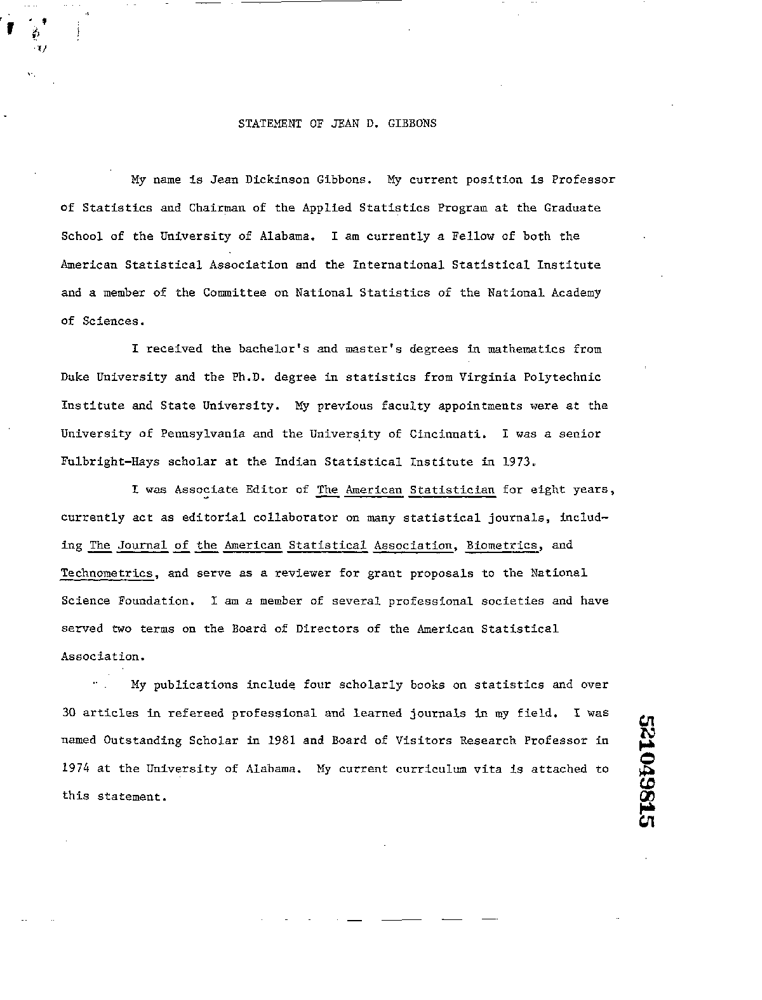

In [ ]:
image

In [ ]:
# prepare image for the model
encoded_inputs = processor(image, return_tensors="pt")

# make sure all keys of encoded_inputs are on the same device as the model
for k,v in encoded_inputs.items():
  encoded_inputs[k] = v.to(model.device)

# forward pass
outputs = model(**encoded_inputs)

In [ ]:
logits = outputs.logits
print(logits.shape)

torch.Size([1, 15])


In [ ]:
predicted_class_idx = logits.argmax(-1).item()
print("Predicted class:", id2label[predicted_class_idx])

Predicted class: resume


Self-Supervised is also possible in Computer Vision. Pretraining tasks include:

* Colorization
* Placing image patches in the right place
* Placing frames in the right order
* Inpainting
* Classify corrupted images


### Downstream Tasks

* Image Classification
* Object Detection
* Image Segmentation


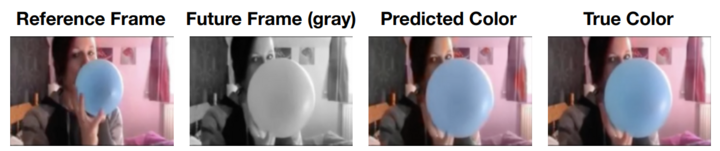


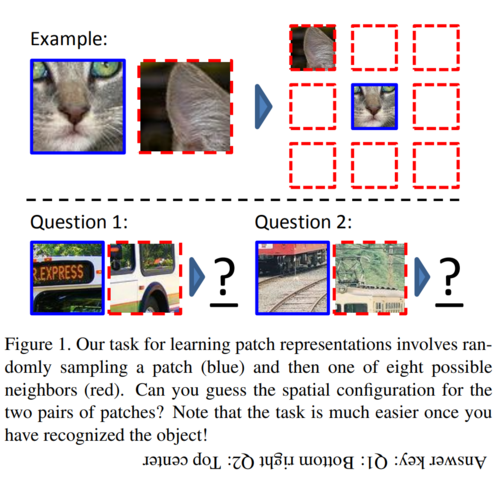


![image.png](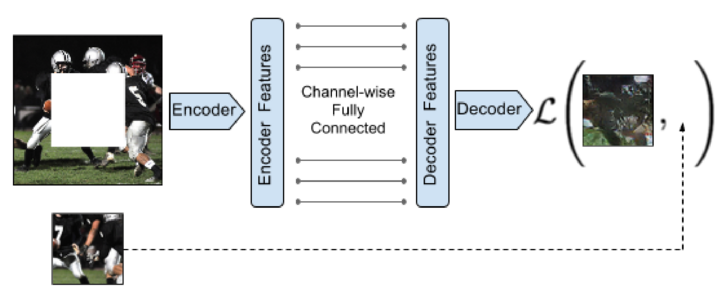CBh4cDLC6haUY8QQN3gWmUZjXeHBKD6UEDBzTGIi9cQ/uGo5gcBzTXBMaFzAQMBAwEDAQMDBLDMyTwRHs/VnSISQPGAgYCBgIGAgYCBiYPQaCh2P2OAs5AgYCBgIGAgYCBgIGZomB4OGYJcJC8oCBgIGAgYCBgIGAgdljIBgcs8dZyBEwEDAQMBAwEDAQMDBLDASDY5YIC8kDBgIGAgYCBgIGAgZmj4FgcMweZyFHwEDAQMBAwEDAQMDALDEQDI5ZIiwkDxgIGAgYCBgIGAgYmD0GgsExe5yFHAEDAQMBAwEDAQMBA7PEQDA4ZomwkDxgIGAgYCBgIGAgYGD2GAgGx+xxFnIEDAQMBAwEDAQMBAzMEgP/Hx5CgJH8PNuIAAAAAElFTkSuQmCC)

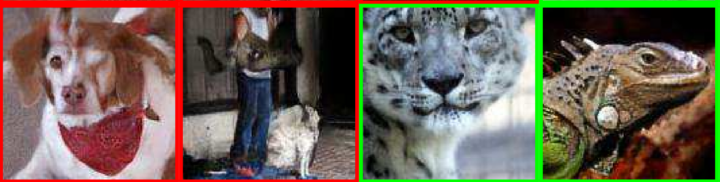




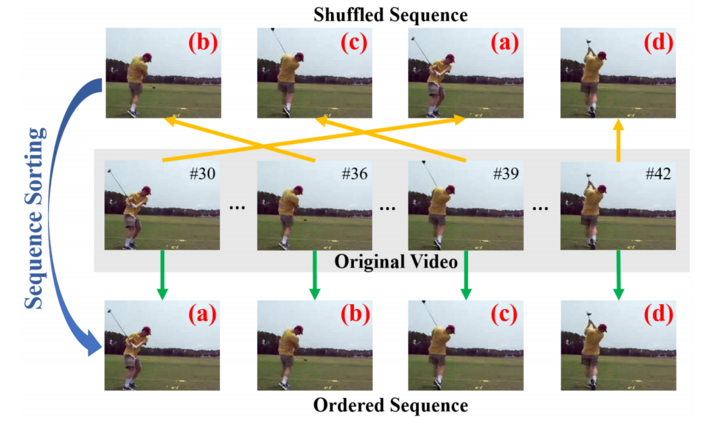

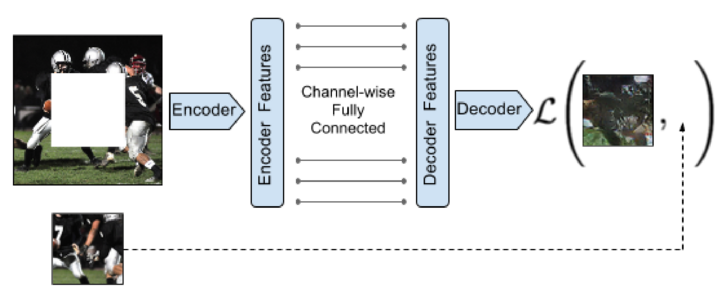

#### Audio/Speech

Outside of text and vision, transfer learning algorithms are used to solve Audio/Speech related tasks like speech recognition or speech-to-text translation.

Interestingly, a pre-trained AI model developed for English speech recognition forms the basis for a French speech recognition model.

# Final Takeaways:

* Transfer learning models focus on storing knowledge gained while solving one problem and applying it to a different but related problem.

* Instead of training a neural network from scratch, many pre-trained models can serve as the starting point for training. These pre-trained models give a more reliable architecture and save time and resources.

* Transfer learning is used in scenarios where there is not enough data for training or when we want better results in a short amount of time.

* Transfer learning involves selecting a source model similar to the target domain, adapting the source model to the target model before transferring the knowledge, and training the source model to achieve the target model.

* It is common to fine-tune the higher-level layers of the model while freezing the lower levels as the basic knowledge is the same that is transferred from the source task to the target task of the same domain.

* In tasks with a small amount of data, if the source model is too similar to the target model, there might be an issue of overfitting. To prevent the transfer learning model from overfitting, it is essential to tune the learning rate, freeze some layers from the source model, or add linear classifiers while training the target model can help avoid this issue.

## The future of Transfer Learning

Machine learning's future depends on organizations and enterprises having widespread access to sophisticated models. Machine learning must be accessible and adaptive to each organization's unique local demands and requirements in order to revolutionize enterprises and procedures. Only a small percentage of companies will have the skills or resources to label data and train a model.

The most difficult part of the supervised machine learning process is getting vast amounts of tagged data. Labeling data can be a time-consuming procedure, especially when dealing with massive amounts of data. The requirement for enormous amounts of labeled data makes the broad construction of the most powerful models impossible.


Transfer learning techniques will allow large-scale machine learning models to be customized for specific activities and settings. The distribution of machine learning models across new sectors and industries will be aided through transfer learning.

# Exercise

#### Ants & Bees Classification

In [ ]:
! curl https://download.pytorch.org/tutorial/hymenoptera_data.zip -o hymenoptera_data.zip
! unzip hymenoptera_data.zip


mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 45.0M  100 45.0M    0     0  72.0M      0 --:--:-- --:--:-- --:--:-- 72.0M


## Pytorch

In [ ]:
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import torchvision
import numpy as np
import torch
import os

# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
}

data_dir = 'hymenoptera_data/'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
dataloaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7f18be2b1d10>,
 'val': <torch.utils.data.dataloader.DataLoader at 0x7f18be2c6950>}

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


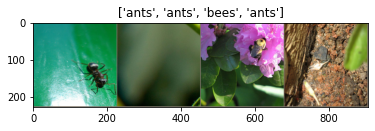

In [ ]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

## Keras

In [ ]:
image_size = (128, 128)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "hymenoptera_data/train",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "hymenoptera_data/val",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 245 files belonging to 2 classes.
Using 196 files for training.
Found 153 files belonging to 2 classes.
Using 30 files for validation.


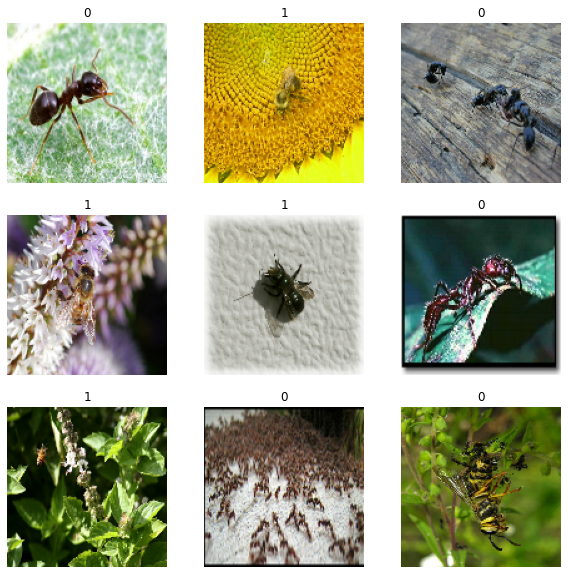

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [ ]:
## Apply Data Augmentation
data_augmentation = keras.Sequential(
    [
        layers.RandomCrop(224, 224),
        layers.RandomFlip("horizontal"),
        layers.Normalization(mean=mean, variance=std),
    ]
)

In [ ]:
input_shape=image_size + (3,)
inputs = keras.Input(shape=input_shape)
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)


train_ds = train_ds.prefetch(buffer_size=32)
val_ds = val_ds.prefetch(buffer_size=32)

## Requirements

Using Resnet18, train model for 20 epochs -

* Without pretrained weights
* With pretrained weights, freezing extractor part.
* With pretrained weights, unfreeze some extra layers in extractor
* With pretrained weights, unfreeze all extractor layers

Show model performance by plotting validation loss and accuracy. 

Discuss difference in results. 



Clue - 
https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html

### References

* https://neptune.ai/blog/transfer-learning-guide-examples-for-images-and-text-in-keras

* https://machinelearningmastery.com/how-to-improve-performance-with-transfer-learning-for-deep-learning-neural-networks/

* https://machinelearningmastery.com/transfer-learning-for-deep-learning/

* https://www.v7labs.com/blog/transfer-learning-guide#:~:text=Transfer%20Learning%20is%20a%20machine,when%20modeling%20the%20second%20task.

* https://builtin.com/data-science/transfer-learning

* https://towardsdatascience.com/an-easy-tutorial-about-sentiment-analysis-with-deep-learning-and-keras-2bf52b9cba91

* https://www.geeksforgeeks.org/word-embeddings-in-nlp/

* https://www.mygreatlearning.com/blog/word-embedding/

* https://stats.stackexchange.com/questions/343763/fine-tuning-vs-transferlearning-vs-learning-from-scratch

* https://github.com/stanfordnlp/GloVe

* https://huggingface.co/docs/transformers/model_doc/bert

* https://arxiv.org/pdf/2012.14740.pdf

* https://colab.research.google.com/github/NielsRogge/Transformers-Tutorials/blob/master/LayoutLMv2/RVL-CDIP/Fine_tuning_LayoutLMv2ForSequenceClassification_on_RVL_CDIP.ipynb#scrollTo=qS7Iz-wDPp51

* https://pytorch.org/hub/pytorch_vision_resnext/

* https://www.researchgate.net/publication/338292155_LayoutLM_Pre-training_of_Text_and_Layout_for_Document_Image_Understanding

* https://www.seldon.io/transfer-learning

* https://www.fast.ai/2020/01/13/self_supervised/

* https://appen.com/blog/data-annotation/